# Football minutes visualisation (Python Demo)

## 1. Load files

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd

In [3]:
man_utd = pd.read_csv('Man Utd.csv')

In [4]:
man_utd.head()

,Shared Minutes,David de Gea,Sergio Romero,Eric Bailly,Victor Lindelöf,Marcos Rojo,Chris Smalling,Phil Jones,Axel Tuanzebe,Daley Blind,...,Scott McTominay,Ashley Young,Henrikh Mkhitaryan,Juan Mata,Alexis Sánchez,Anthony Martial,Jesse Lingard,Romelu Lukaku,Marcus Rashford,Zlatan Ibrahimovic
0,David de Gea,3330,0,910,1284,550,2535,1975,1,284,...,539,2388,932,1841,959,1582,1824,2869,1717,102
1,Sergio Romero,0,90,90,0,90,0,0,0,77,...,90,60,0,90,90,0,0,0,90,0
2,Eric Bailly,910,90,1000,11,90,385,693,0,348,...,195,598,622,553,262,186,199,909,730,0
3,Victor Lindelöf,1284,0,11,1284,270,1104,361,1,3,...,227,1066,163,642,525,668,895,988,526,57
4,Marcos Rojo,550,90,90,270,640,415,159,1,80,...,184,430,0,432,180,354,389,371,327,77


In [14]:
minmap = np.array(man_utd)[:,1:].astype(int)

## 2. Matrix heatmap

Write function for plotting the heatmap.

In [60]:
def minMatrix(data, team, compyear, colour):
    minmap1 = np.array(data)[:,1:].astype(int)
    # Generate a player minutes matrix 

    mask1 = np.zeros_like(minmap1)
    mask1[np.triu_indices_from(mask1)] = True
    for i in range(len(mask1)):
        mask1[i][i] = 0

    plt.figure(figsize = (0.7*data.shape[0],10))


    ax = sns.heatmap(minmap1, cmap = colour, linewidths=.4, annot=True, fmt="d", mask = mask1, yticklabels=data.columns[1:], 
                    xticklabels=data.columns[1:])
    #ax.xaxis.set_tick_params(labeltop=True)
    ax.set_title(f"{team} player minutes matrix ({compyear})")
    ax.text(0.8, 0.9, 'Data from Transfermarkt', style='italic',transform=ax.transAxes)
    ax.text(0.8, 0.5, 'Numbers indicate total \n shared pitch time \n (in minutes)', style='italic', transform=ax.transAxes)

In [61]:
manu18.shape[0]

26

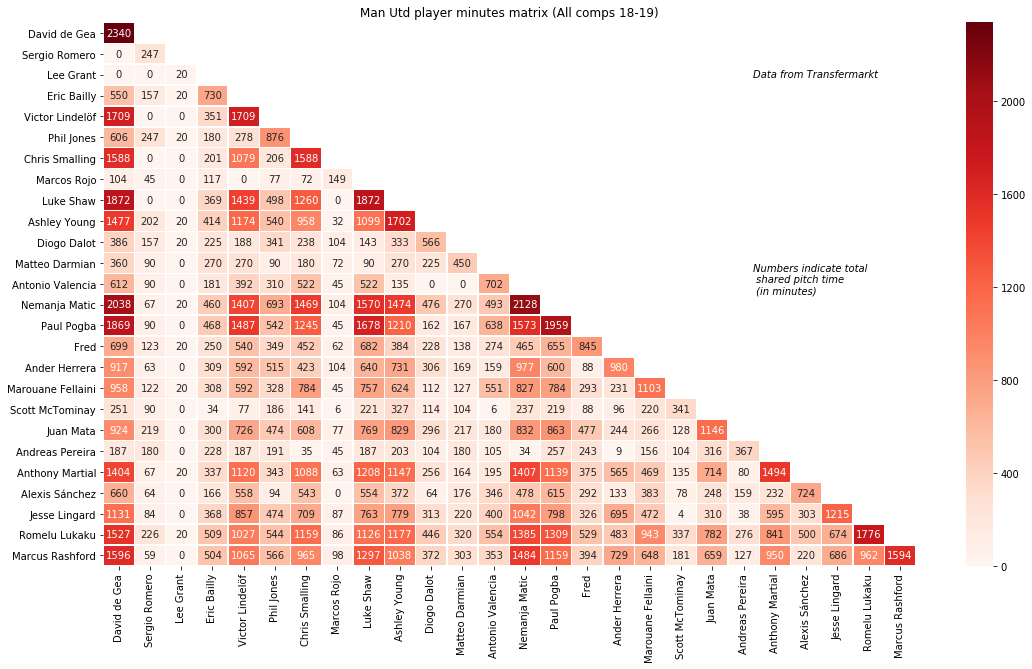

In [62]:
manu18 = pd.read_csv('Manutd1819new.csv')
minMatrix(manu18, "Man Utd", "All comps 18-19", "Reds")

What about Shit.FC?

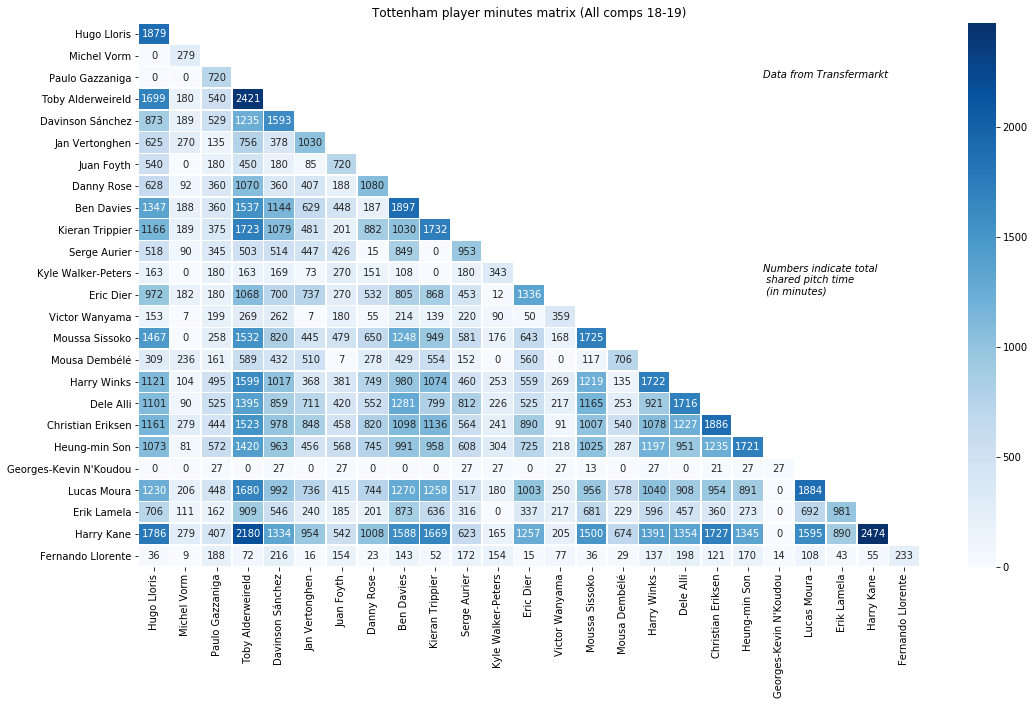

In [63]:
spurs18 = pd.read_csv('Spurs1819new.csv')
minMatrix(spurs18, "Tottenham", "All comps 18-19", "Blues")

Abu Dhabi FC?

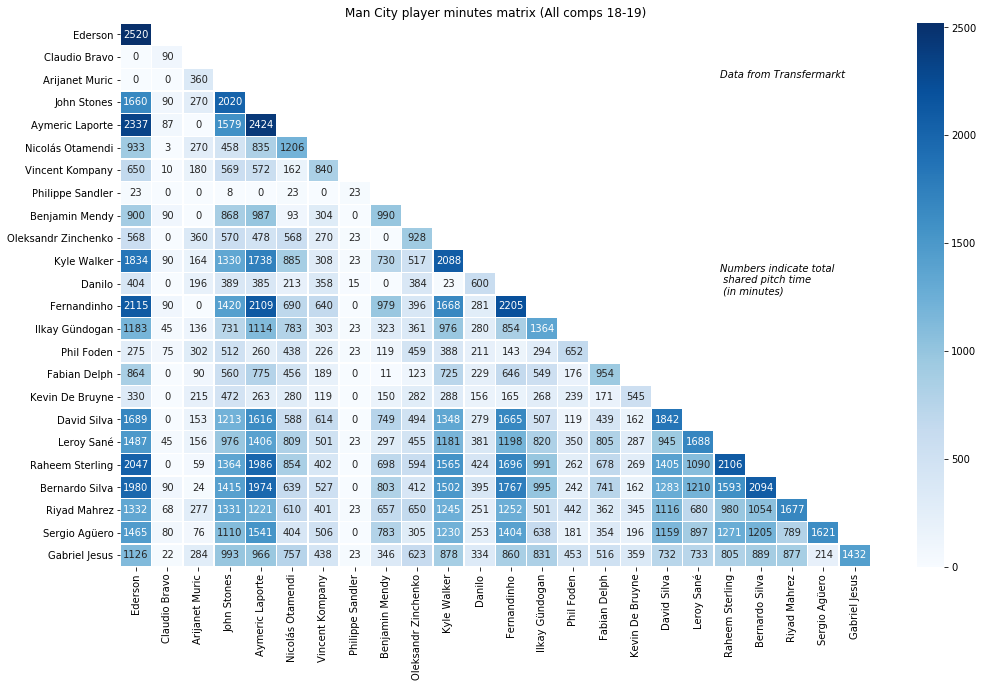

In [64]:
mancity18 = pd.read_csv('Mancity1819new.csv')
minMatrix(mancity18, "Man City", "All comps 18-19", "Blues")

Finally, let's try something retro!

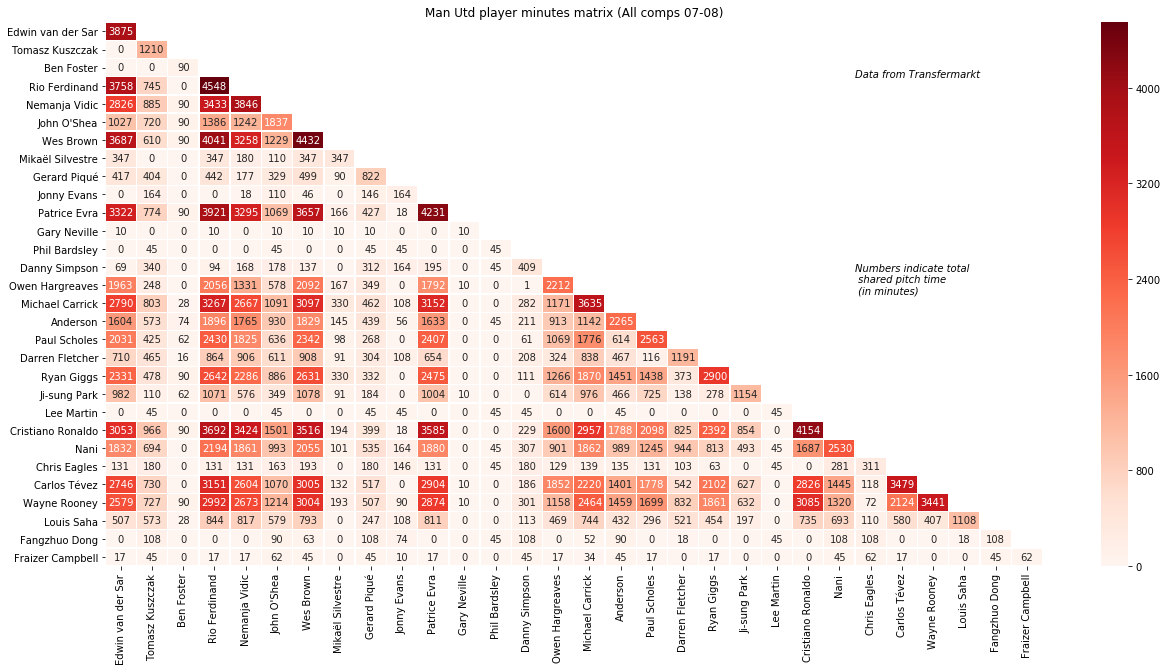

In [65]:
manu0708 = pd.read_csv('Manutd0708.csv')
minMatrix(manu0708, "Man Utd", "All comps 07-08", "Reds")

## 3. Visualising cumulative minutes w.r.t matchday.

In [10]:
pIndiv = np.load("Man Utd.npy")

In [46]:
PL1819 = pIndiv[:,0,10:22]   #EPL fixtures so far 18-19

In [47]:
PL1819cum = np.cumsum(PL1819,axis=1)  #Cumulative minutes

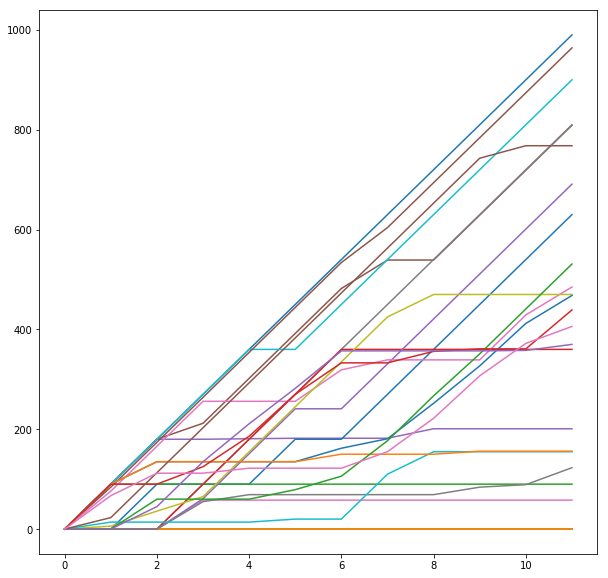

In [48]:
fig, ax = plt.subplots(1,1, figsize = (10,10))
for pl in PL1819cum:
    plt.plot(np.arange(0,12), pl)

Consider an alternative and less "busy" visualisation of growing bar graphs of each player? Need to factor in easing if I want to animate the minute growth with matchday